## Advance Machine Learning HW 3

In [1]:
## Import Libraries
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from itertools import *
from more_itertools import *
from functools import *
from collections import *
import torch.nn.functional as F
from sympy import *
from torch.utils.data import TensorDataset, DataLoader

### Initiate Data

In [2]:
training_data = datasets.QMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.QMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

QMIST Data Structure


| Column                     | Description                  | Range              |
|----------------------------|------------------------------|--------------------|
| 0                          | Character class              | 0 to 9             |
| 1                          | NIST HSF series              | 0, 1, or 4         |
| 2                          | NIST writer ID               | 0-610 and 2100-2599|
| 3                          | Digit index for this writer  | 0 to 149           |
| 4                          | NIST class code              | 30-39              |
| 5                          | Global NIST digit index      | 0 to 281769        |
| 6                          | Duplicate                    | 0                  |
| 7                          | Unused                       | 0                  |


In [3]:
print("Training Data  : ", len(training_data))
print("Test Data      : ", len(test_data))
print("Shape of training data           : ", training_data.data.shape)
print("Shape of labels for training data: ", training_data.targets.shape) ## These are listed above
print("shape of Test data               : ", test_data.data.shape)
print("Shape of labels for test data    : ", test_data.targets.shape)

Training Data  :  60000
Test Data      :  60000
Shape of training data           :  torch.Size([60000, 28, 28])
Shape of labels for training data:  torch.Size([60000, 8])
shape of Test data               :  torch.Size([60000, 28, 28])
Shape of labels for test data    :  torch.Size([60000, 8])


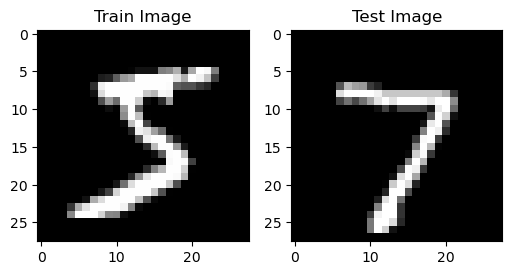

In [4]:
## Plot first image from training and test data.
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(training_data.data[0], cmap='gray')
plt.title('Train Image')

plt.subplot(1,2,2)
plt.imshow(test_data.data[0], cmap='gray')
plt.title('Test Image')
plt.show()

In [5]:
# Extract data for the high school students.
HSidx = [idx for idx, target in enumerate(training_data.targets) if target[1] == 4]
HSidx_test = [idx for idx, target in enumerate(test_data.targets) if target[1] == 4]
print("Number of images by HS students in train data: ", len(HSidx))
print("Number of images by HS students in test data : ", len(HSidx_test))

Number of images by HS students in train data:  29050
Number of images by HS students in test data :  29595


In [6]:
## Get the data for the high school students.
train_images = training_data.data[HSidx]
train_labels = training_data.targets[HSidx]
test_images = test_data.data[HSidx_test]
test_labels = test_data.targets[HSidx_test]
print("Shape of training images for HS students: ", train_images.shape)
print("Shape of training labels for HS students: ", train_labels.shape)
print("Shape of test images for HS students    : ", test_images.shape)
print("Shape of test labels for HS students    : ", test_labels.shape)

Shape of training images for HS students:  torch.Size([29050, 28, 28])
Shape of training labels for HS students:  torch.Size([29050, 8])
Shape of test images for HS students    :  torch.Size([29595, 28, 28])
Shape of test labels for HS students    :  torch.Size([29595, 8])


In [7]:
## Create a list of labels and writer idx for the data. We will only use there as out label everythin else is useless to us.
digit_label = train_labels[:,0]
writer_idx = train_labels[:,2]
digit_label_test = test_labels[:,0]
writer_idx_test = test_labels[:,2]
print("Shape of digit labels: ", digit_label.shape)
print("Shape of writer idx: ", writer_idx.shape)
print("Shape of digit labels for test data: ", digit_label_test.shape)
print("Shape of writer idx for test data: ", writer_idx_test.shape)

Shape of digit labels:  torch.Size([29050])
Shape of writer idx:  torch.Size([29050])
Shape of digit labels for test data:  torch.Size([29595])
Shape of writer idx for test data:  torch.Size([29595])


In [8]:
## Now we hot encode the labels.
unique_labels = torch.unique(digit_label)
unique_writers = torch.unique(writer_idx)
unique_labels_test = torch.unique(digit_label_test)
unique_writers_test = torch.unique(writer_idx_test)

num_unique_labels = len(unique_labels)
num_unique_writers = len(unique_writers)
num_unique_labels_test = len(unique_labels_test)
num_unique_writers_test = len(unique_writers_test)
print("Number of unique labels: ", num_unique_labels)
print("Number of unique writers: ", num_unique_writers)
print("Number of unique labels for test data: ", num_unique_labels_test)
print("Number of unique writers for test data: ", num_unique_writers_test)

## Labels are already uniquily mapped we need to map the writer idx to a unique number.
writer_idx_map = {writer.item(): idx for idx, writer in enumerate(unique_writers)}

## Now we map the writer idx to the unique number.
writer_idx_mapped = torch.tensor([writer_idx_map[writer.item()] for writer in writer_idx])
# writer_idx_mapped_test = torch.tensor([writer_idx_map[writer.item()] for writer in writer_idx_test])

## One Hot Encode the labels.
one_hot_digits = F.one_hot(digit_label, num_classes=num_unique_labels)
one_hot_writer = F.one_hot(writer_idx_mapped, num_classes=num_unique_writers)

one_hot_digits_test = F.one_hot(digit_label_test, num_classes=num_unique_labels_test)
# one_hot_writer_test = F.one_hot(writer_idx_mapped_test, num_classes=num_unique_writers_test)
print("Shape of one hot encoded labels: ", one_hot_digits.shape)
print("Shape of one hot encoded writer idx: ", one_hot_writer.shape)
print("Shape of one hot encoded labels for test data: ", one_hot_digits_test.shape)
# print("Shape of one hot encoded writer idx for test data: ", one_hot_writer_test.shape)

print("Five one hot encoded labels: ", one_hot_digits[:5])
print("Five one hot encoded writer idx: ", one_hot_writer[:5])

Number of unique labels:  10
Number of unique writers:  250
Number of unique labels for test data:  10
Number of unique writers for test data:  250
Shape of one hot encoded labels:  torch.Size([29050, 10])
Shape of one hot encoded writer idx:  torch.Size([29050, 250])
Shape of one hot encoded labels for test data:  torch.Size([29595, 10])
Five one hot encoded labels:  tensor([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])
Five one hot encoded writer idx:  tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])


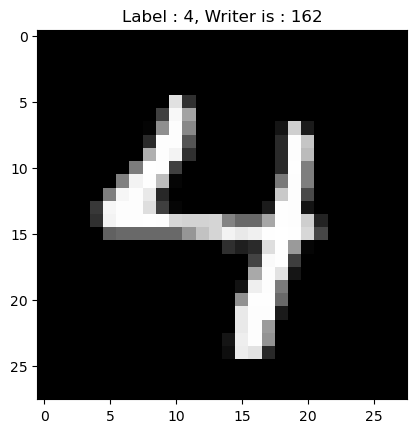

In [9]:
## Sanity Check
check_idx = torch.randint(train_images.shape[0], (1,1)).item()
plt.imshow(train_images[check_idx], cmap='gray')
plt.title(f"Label : {torch.argmax(one_hot_digits[check_idx])}, Writer is : {torch.argmax(one_hot_writer[check_idx])}")
plt.show()

In [10]:
# Now we have
print("Training Images : ", train_images.shape)
print("One Hot Digits  : ", one_hot_digits.shape)
print("One Hot Writer  : ", one_hot_writer.shape)

Training Images :  torch.Size([29050, 28, 28])
One Hot Digits  :  torch.Size([29050, 10])
One Hot Writer  :  torch.Size([29050, 250])


In [11]:
one_hot_digits_transpose = one_hot_digits.T
one_hot_writer_transpose = one_hot_writer.T

mask_digit_writer = torch.einsum('ijk, mjk-> mij', one_hot_digits_transpose.unsqueeze(-1), one_hot_writer_transpose.unsqueeze(-1))
print(mask_digit_writer.shape)

torch.Size([250, 10, 29050])


In [12]:
class CustomDataset(Dataset):
  def __init__(self, images, one_hot_writer, one_hot_digits):
     super().__init__()
     self.images = images.reshape((-1,28*28)).to(torch.float32) / 255    ## Normalize the images.
     self.labels = torch.cat((one_hot_digits, one_hot_writer), dim = -1)

  def __len__(self):
    return len(self.images)

  def __getitem__(self, idx):
    return self.images[idx], self.labels[idx]

def collate_wrapper(batch):
  ## Get the indices of data that we want to make the batch of.
  while True:
    writer_rand = torch.randint(0, num_unique_writers, (6,))
    image_idxs = []
    for writer in writer_rand:
      for digit in range(10):
        images_with_writer_digit = torch.nonzero(mask_digit_writer[writer,digit,:])
        if images_with_writer_digit.shape[0] == 0:
          continue
        rand_int = torch.randint(0, images_with_writer_digit.shape[0], (1,))
        image_idxs.append(images_with_writer_digit[rand_int].item())
    curr_batch = [batch[idx] for idx in image_idxs]
    if len(curr_batch) == 60:
      break
  images, labels = zip(*curr_batch)
  images = torch.stack(images)
  labels = torch.stack(labels)

  mask = torch.zeros((1,60))
  rand_digit_to_train = torch.randint(0,10, (1,))
  indices_to_train_in_mask = [rand_digit_to_train + 10*i for i in range(0,6)]
  mask[0,indices_to_train_in_mask] = 1
  return images, labels, mask

dataset = CustomDataset(train_images, one_hot_writer, one_hot_digits)

dataloader = DataLoader(dataset, batch_size=len(dataset),collate_fn=collate_wrapper, pin_memory=True, shuffle=True)

for batch in dataloader:
  images, labels, mask = batch
  print(images.shape)
  print(labels.shape)
  print(f"Writer : {torch.argmax(labels[0,:10])}")

torch.Size([60, 784])
torch.Size([60, 260])
Writer : 3


### Define Model

In [13]:
import torch
import torch.nn as nn
from torch.nn.functional import cross_entropy as ce_loss
import torch.nn.utils.parametrize as parametrize

In [14]:
class EinLinear(nn.Module):
    def __init__(self, dims):
        super(EinLinear, self).__init__()
        self.dims = dims
        self.weights = nn.Parameter(torch.randn(dims) / torch.sqrt(torch.tensor(dims[0]))) ## HE Normal Initialization.
    
    def forward(self, x):
        return self.ein_multi(x)
    
    def ein_multi(self, x):
        output = torch.einsum('bi, ik -> bk', x, self.weights)
        return output

In [15]:
class MaskSubsetLinear(nn.Module):
    def __init__(self, dims):
        super(MaskSubsetLinear, self).__init__()
        self.dims = dims
        self.weights = nn.Parameter(torch.randn(dims) / torch.sqrt(torch.tensor(dims[0]))) ## HE Normal Initialization
    
    def forward(self, x, mask):
        return self.masksubset_mult(x, mask)
    
    def masksubset_mult(self,X,mask):
        Xm = torch.einsum('bi, kb -> bi', X, mask)
        masked_dot_prod = torch.einsum('bi, ik -> bk', Xm, self.weights)
        return masked_dot_prod ## 60*500

In [16]:
class Masked_MLP(nn.Module):
    def __init__(self, input_dim,  output_dim, learning_rate = 1e-3):
        super(Masked_MLP, self).__init__()
        self.input_fc = MaskSubsetLinear((input_dim, 500))
        self.hidden_fc = EinLinear((500, 500))
        self.output_fc = EinLinear((500, output_dim))
        self.learning_rate = learning_rate
        self.optimizer = self.configure_optimizers()
        self.loss = self.criterion
        self.train_log_error = list()
        self.test_log_error = list()

    def forward(self, x, mask):
        h_1 = F.relu(self.input_fc(x,mask))  ## H1 shape 60,250
        h_2 = F.relu(self.hidden_fc(h_1))   ## H2 shape 60,100
        y_pred = self.output_fc(h_2)
        return y_pred, h_2

    def criterion(self,yhat,y,mask):
        # need to implement masked loss ## 1,60
        digit_pred = yhat[:,:10]        ## 60*10
        writer_pred = yhat[:,10:]       ## 60*50
        digit_true = y[:,:10]
        writer_true = y[:,10:]

        masked_digit_pred = torch.einsum('ik, mi -> ik', digit_pred, mask)
        masked_digit_true = torch.einsum('ik, mi -> ik', digit_true, mask)
        masked_writer_pred = torch.einsum('ik, mi -> ik', writer_pred, mask)
        masked_writer_true = torch.einsum('ik, mi -> ik', writer_true, mask)

        l1 = ce_loss(masked_digit_pred, masked_digit_true)
        l2 = ce_loss(masked_writer_pred, masked_writer_true)
        return l1 + l2

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(),lr=self.learning_rate)
        return optimizer

    def training_step(self, batch):
        x,y,mask = batch

        self.train(True)
        self.optimizer.zero_grad()
        x, mask, y = x.to(device), mask.to(device), y.to(device)
        x, mask, y = x.float(), mask.float(), y.float()
        y_pred,_ = self.forward(x,mask)
        error = self.criterion(y_pred,y, mask)
        error.backward()
        self.optimizer.step()

        self.train_log_error.append(error.cpu().detach().item())
        return error

    def predict(self, batch):
        x, y, mask = batch

        self.train(False)
        self.optimizer.zero_grad()
        x, mask, y = x.to(device), mask.to(device), y.to(device)
        x, mask, y = x.float(), mask.float(), y.float()
        y_pred,_ = self.forward(x,mask)
        error = self.criterion(y_pred,y, mask)
        self.test_log_error.append(error.cpu().detach().item())
        
        return error
    
    def get_predictions(self, x, mask):
        self.train(False)
        x, mask = x.to(device), mask.to(device)
        x, mask = x.float(), mask.float()
        y_pred,_ = self.forward(x,mask)
        return y_pred

In [17]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [18]:
input_dim = 784
output_dim = 260

model = Masked_MLP(input_dim, output_dim)
model = model.to(device)

EPOCHS = 50000

labeles_for_accuracy = torch.cat((one_hot_digits, one_hot_writer), dim = -1)
images_for_accuracy = train_images.reshape((-1,28*28)).to(torch.float32) / 255

# best_valid_loss = float('inf')

for epoch in range(EPOCHS):
    for batch in dataloader:
      train_loss = model.training_step(batch)

      val_batch = (images_for_accuracy, labeles_for_accuracy, torch.ones((1,images_for_accuracy.shape[0])))
      val_loss = model.predict(val_batch)

    print(f"Epoch : {epoch}, Train Loss : {train_loss}, Validation Loss : {val_loss}")

Epoch : 0, Train Loss : 0.7841068506240845, Validation Loss : 7.861734390258789
Epoch : 1, Train Loss : 0.7904274463653564, Validation Loss : 7.840848922729492
Epoch : 2, Train Loss : 0.8108952641487122, Validation Loss : 7.81758975982666
Epoch : 3, Train Loss : 0.7884393334388733, Validation Loss : 7.81183385848999
Epoch : 4, Train Loss : 0.791789710521698, Validation Loss : 7.807873725891113
Epoch : 5, Train Loss : 0.7495805025100708, Validation Loss : 7.83036994934082
Epoch : 6, Train Loss : 0.7778148651123047, Validation Loss : 7.8418965339660645
Epoch : 7, Train Loss : 0.7891082763671875, Validation Loss : 7.821998596191406
Epoch : 8, Train Loss : 0.7797510027885437, Validation Loss : 7.794310569763184
Epoch : 9, Train Loss : 0.8198365569114685, Validation Loss : 7.747273921966553
Epoch : 10, Train Loss : 0.7667331099510193, Validation Loss : 7.70208740234375
Epoch : 11, Train Loss : 0.7819262742996216, Validation Loss : 7.667760848999023
Epoch : 12, Train Loss : 0.787796437740325

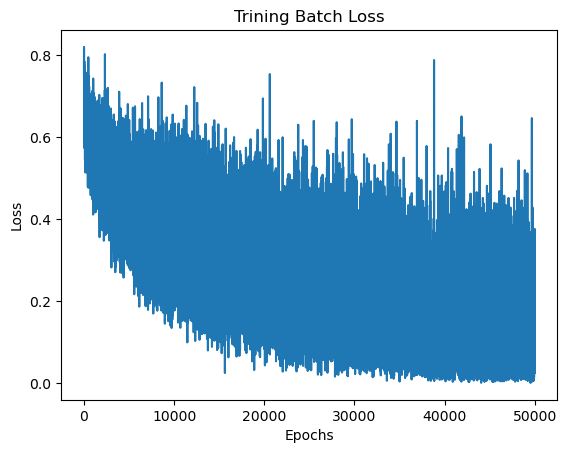

In [38]:
plt.plot(model.train_log_error)
plt.title('Trining Batch Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

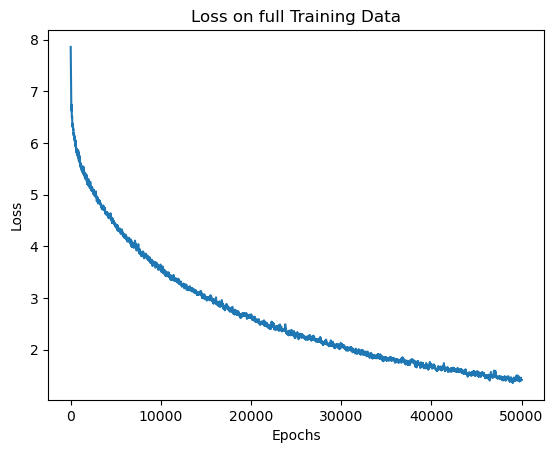

In [39]:
plt.plot(model.test_log_error)
plt.title('Loss on full Training Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [25]:
torch.save(model, 'model50k.pth')

### Qualitative Results on Train Data.

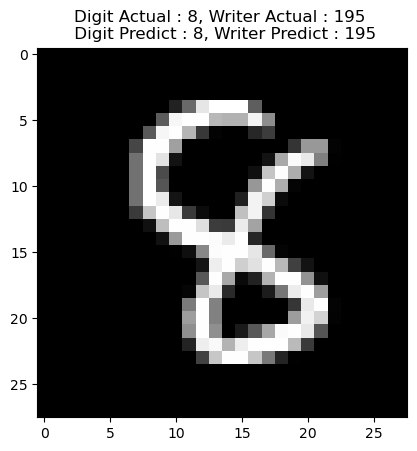

In [37]:
## Make predictions
model.eval()
for batch in dataloader:
    with torch.no_grad():
        x,y,mask = batch
        x, mask, y = x.to(device), mask.to(device), y.to(device)
        x, mask, y = x.float(), mask.float(), y.float()
        y_pred,_ = model.forward(x,mask)
        item_idx = torch.argmax(mask[0,:], dim = -1).item()
        image = x[item_idx].reshape(28,28).cpu().detach().numpy()
        plt.imshow(image, cmap='gray')
        plt.title(f"Digit Actual : {torch.argmax(y[item_idx,:10]).item()}, Writer Actual : {torch.argmax(y[item_idx,10:]).item()} \n Digit Predict : {torch.argmax(y_pred[item_idx,:10]).item()}, Writer Predict : {torch.argmax(y_pred[item_idx,10:]).item()}")
        plt.show()
    break

### Quant Test.

In [35]:
## Accuracy on Train Data.
labeles_for_accuracy = torch.cat((one_hot_digits, one_hot_writer), dim = -1)

images_for_accuracy = train_images.reshape((-1,28*28)).to(torch.float32) / 255

## Make predictions on all images.
model.eval()
output = model.get_predictions(images_for_accuracy, torch.ones((1,images_for_accuracy.shape[0])).to(device))
output = output.cpu().detach()

## Digit Prediction Accuracy.
digit_pred_accuracy = torch.sum(torch.argmax(output[:,:10], dim = -1) == torch.argmax(one_hot_digits, dim = -1)).item() / len(one_hot_digits)
writer_pred_accuracy = torch.sum(torch.argmax(output[:,10:], dim = -1) == torch.argmax(one_hot_writer, dim = -1)).item() / len(one_hot_writer)

print("Digit Prediction Accuracy on Train Data: ", digit_pred_accuracy)
print("Writer Prediction Accuracy on Train Data: ", writer_pred_accuracy)

Digit Prediction Accuracy on Train Data:  0.9903270223752152
Writer Prediction Accuracy on Train Data:  0.6520137693631669


### As there are no same writer in the test set, we only calculate the accuracy of digit prediction on the test data.

In [36]:
## Predictions on test data.
images_for_accuracy_test = test_images.reshape((-1,28*28)).to(torch.float32) / 255

## Make predictions on all images.
model.eval()
output_test = model.get_predictions(images_for_accuracy_test, torch.ones((1,images_for_accuracy_test.shape[0])).to(device))
output_test = output_test.cpu().detach()

## Digit Prediction Accuracy.
digit_pred_accuracy_test = torch.sum(torch.argmax(output_test[:,:10], dim = -1) == torch.argmax(one_hot_digits_test, dim = -1)).item() / len(one_hot_digits_test)
print("Digit Prediction Accuracy on Test Data: ", digit_pred_accuracy_test)

Digit Prediction Accuracy on Test Data:  0.9530663963507349
